# Project1 part 1: Luis solution (from (a) to (c))

### Importing packages

In [1]:
from random import random, seed
from numpy import *
from matplotlib.pyplot import *

### Part a) Ordinary Least Square on the Franke function with resampling.

In [2]:
# Creating a N number of uniform distributed data samples of x and y
N = 100

random.seed(7)
x = random.uniform(0,1,N)
y = random.uniform(0,1,N)
x, y = meshgrid(x,y)

# Sorting x- and y-coordinates
x.sort()
y.T.sort()

# Creating a coordinate basis for plotting
xb = linspace(0, 1, N)
yb = linspace(0, 1, N)
xb, yb = meshgrid(xb,yb)

#### Defining Franke function with noise N(0,1) and saving it on the variable "z"

In [3]:
# This definition runs the normal Franke function and adds noise (N(0,1)) if the noise_num is equal to 1.
def FrankeFunction(x,y,noise_num):
    term1 = 0.75*exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*exp(-(9*x-4)**2 - (9*y-7)**2)
    
    function = term1 + term2 + term3 + term4
    
    if noise_num == 1:
        mu, sigma = 0, 1 # mean and standard deviation
        
        random.seed(15)
        noise = random.normal(mu, sigma, N)
        
        function = function + noise
    
    return function

add_noise = 1 # Add noise to the Franke's function if add_noise = 1
z = FrankeFunction(x,y,add_noise)

In [4]:
# Creating a Vandermonde matrix from x- and y-data, which the order can be specified up too 5. order 
def Vandermonde(x,y,order):
    '''
    Create a Vandermonde matrix from x- and y-data, which the order can be specified up too 5. order
    
      (x,y): Input variables
      order: Desired polynomial degree
    Returns: This fuction returns a matrix of (N,p), where N is the number samples and p the features.
    '''
    x = ravel(x)
    y = ravel(y)
    N = size(x)
    
    if order == 1:
        X = c_[ones((N,1)), x, y]
        
    if order == 2:
        X = c_[ones((N,1)), x, x**2, y, y**2, x*y]
        
    if order == 3:
        X = c_[ones((N,1)), x, x**2, x**3, y , y**2, y**3, x*y, x**2*y, x*y**2]
        
    if order == 4:
        X = c_[ones((N,1)), x, x**2, x**3, x**4, y, y**2, y**3, y**4, x*y, x**2*y, x*y**2, x**3*y, x**2*y**2, x*y**3]
    
    if order == 5:
        X = c_[ones((N,1)), x, x**2, x**3, x**4, x**5, y, y**2, y**3, y**4, y**5, x*y, x**2*y, x*y**2, x**3*y, x**2*y**2, \
               x*y**3,x**4*y, x**3*y**2, x**2*y**3, x*y**4]
    return X

# Vandermonde matrix of degree 5
Xmatrix = Vandermonde(x,y,5)
Xbmatrix = Vandermonde(xb,yb,5)

#### Now that our Franke function data and Vandermonde matrix have been created, we start our Ordinary Least Square method

In [5]:
# Estimating the polynomial regression coefficients (using ordinary least squares estimation), with the given "data"
# and "Vandermonde matrix".
def betaOLS(data, Vandermonde_matrix):
    data = ravel(data)
    
    beta_coefficient = linalg.inv(Vandermonde_matrix.T.dot(Vandermonde_matrix)).dot(Vandermonde_matrix.T).dot(data)
    return beta_coefficient
    
beta = betaOLS(z, Xmatrix)

#### Creating prediction (OLS) 

In [6]:
# Estimating the prediction of "data" by Ordinary Least Squares method 
def PredictionOLS(data, Vandermonde_matrix, order):
    '''
    Estimating the prediction of "data" by Ordinary Least Squares method
    
    Requirements: Vandermonde matrix function (earlier defined) and OLS regression coefficients "betaOLS".
    
                  data: Data from which we want a prediction for.
    Vandermonde_matrix: In this case, a Vandermonde matrix of x and y dependence.
                 order: Here we send the order in which "Vandermonde_matrix" was fitted.
    '''
    
    # Checking if "data" is a vector or a matrix, by checking the number of output the shape() function gives
    if size(data.shape) == 1:
        [n] = data.shape
    
        # Creating a coordinate basis
        xb = linspace(0, 1, n)
        yb = linspace(0, 1, n)
        Xbmatrix = Vandermonde(xb,yb,order)
    
        beta = betaOLS(data, Vandermonde_matrix)
    
        prediction = Xbmatrix.dot(beta)        
    
    else:
        [n,m] = data.shape
    
        # Creating a coordinate basis
        xb = linspace(0, 1, n)
        yb = linspace(0, 1, m)
        xb, yb = meshgrid(xb,yb)
        Xbmatrix = Vandermonde(xb,yb,order)
    
        beta = betaOLS(data, Vandermonde_matrix)
    
        prediction = Xbmatrix.dot(beta)
        prediction = prediction.reshape((n, m))
    return prediction

ZpredicOLS = PredictionOLS(z, Xmatrix, 5)

#### Plotting

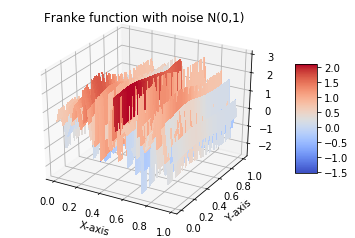

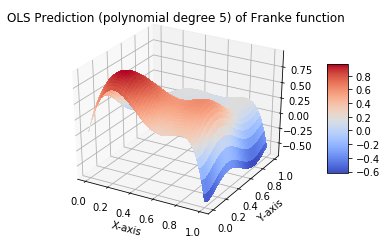

In [7]:
# For 3d plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = figure()
ax = fig.gca(projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap = cm.coolwarm, linewidth =0, antialiased = False)
xlabel(r'X-axis')
ylabel(r'Y-axis')
title(r'Franke function with noise N(0,1)')

#Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5,aspect=5)
show()

fig = figure()
ax = fig.gca(projection='3d')
surfpred = ax.plot_surface(xb, yb, ZpredicOLS, cmap = cm.coolwarm, linewidth =0, antialiased = False)
xlabel(r'X-axis')
ylabel(r'Y-axis')
title(r'OLS Prediction (polynomial degree 5) of Franke function')

#Add a color bar which maps values to colors.
fig.colorbar(surfpred, shrink=0.5,aspect=5)
show()

#### Estimating the variance of of the least squares parameter estimates (beta)

In [8]:
# We send in the Vandermonde matrix "X", assuming that each column corresponds to a dimention/feature
def beta_variance(data, prediction, X):
    N = len(X)    # Extracting the number of samples 
    p = len(X[0]) # Extracting the number of features
    
    sigma2 = 1/(N - p - 1)*sum((data - prediction)**2)
    estimation = linalg.inv(X.T.dot(X))*sigma2
    return estimation.diagonal()

print("Estimated variance of beta parameters:")
print(beta_variance(z, ZpredicOLS, Xmatrix))

Estimated variance of beta parameters:
[2.95213582e-02 4.22157581e+00 1.04823575e+02 5.59952660e+02
 6.44540514e+02 1.03336483e+02 3.53507034e+00 8.35291037e+01
 4.31355090e+02 4.82639160e+02 7.63646595e+01 5.43992621e+01
 2.64635698e+02 2.53090048e+02 3.15038057e+02 2.64840996e+02
 3.03877051e+02 6.28137701e+01 6.21822368e+01 5.98637684e+01
 6.32647201e+01]


##### Estimating the Mean Squared error, Bias, prediction variance and R^2 score

In [9]:
# Defined estimate function of mean squared error
def mse(data, prediction):
    data = data.ravel()
    prediction = prediction.ravel()
    
    L = size(data) # Total number of data points
    estimate = sum((data - prediction)**2)/L
    return estimate

# Defined estimate function of bias
def bias(data, prediction):
    data = data.ravel()
    prediction = prediction.ravel()
    
    L = size(data) # Total number of data points
    estimate = sum((data - mean(prediction))**2)/L
    return estimate

# Just my home brew variance
def my_var(data):
    data = data.ravel()
    
    L = size(data) # Total number of data points
    estimate = sum((data - data.mean())**2)/L
    return estimate

# Defined estimate function of R2 score
def R2(data, prediction):
    data = data.ravel()
    prediction = prediction.ravel()

    estimate = 1 - sum((data - prediction)**2)/sum((data - data.mean())**2)
    return estimate
    
print("The OLS mean squared error: %.3f" % mse(z,ZpredicOLS))
# Bias must be wrong since it is greater than MSE
print("The OLS Bias: %.3f" % bias(z, ZpredicOLS))
print("Variance of the predictor: %.3f" % my_var(ZpredicOLS))
print('The OLS R2 score: %.3f' % R2(z,ZpredicOLS))

The OLS mean squared error: 1.035
The OLS Bias: 1.096
Variance of the predictor: 0.092
The OLS R2 score: 0.054


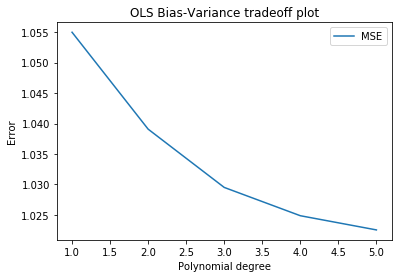

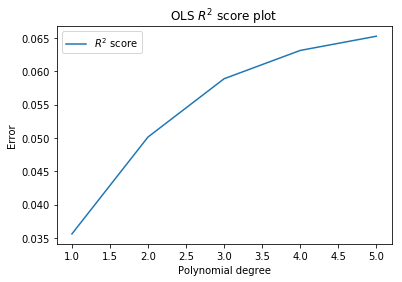

In [10]:
# Bias-Variance tradeoff plot

## Estimate the OLS predictions from 1. degree to 5. degree polynomial fit
i = 0
ZpredicOLS_temp = []
for i in range(0,5):
    X_temp = Vandermonde(xb,yb,(i+1))
    ZpredicOLS_temp.append(PredictionOLS(z, X_temp,(i+1)))

## Estimate the MSE, Bias and prediction variance for each corresponding polynomial fit
j = 0
array_OLS_MSE = zeros(5)
array_OLS_Bias = zeros(5)
array_OLS_Var = zeros(5)
array_OLS_Noise = zeros(5)
array_OLS_R2 = zeros(5)
for j in range(0,5):
    array_OLS_MSE[j] = mse(z, ZpredicOLS_temp[j])
    array_OLS_Bias[j] = bias(z, ZpredicOLS_temp[j])
    array_OLS_Var[j] = my_var(ZpredicOLS_temp[j])
    array_OLS_Noise[j] = my_var(z)
    array_OLS_R2[j] = R2(z, ZpredicOLS_temp[j])

plot(linspace(1,5,5), array_OLS_MSE, label='MSE')

## Bias, prediction variance and noise do not agree with MSE, so I left them out
#plot(linspace(1,5,5), array_OLS_Bias, label='Bias^2')
#plot(linspace(1,5,5), array_OLS_Var, label='Prediction var')
#plot(linspace(1,5,5), array_OLS_Noise , '--', label='patch noise')
xlabel("Polynomial degree")
ylabel("Error")
title("OLS Bias-Variance tradeoff plot")
legend()
show()

plot(linspace(1,5,5), array_OLS_R2, label='$R^2$ score')
xlabel("Polynomial degree")
ylabel("Error")
title("OLS $R^2$ score plot")
legend()
show()

#### Resampling methods (k-fold cross-validation)

In [11]:
def Kfold_train_test_split(data, K):
    '''
    Return: This function returns two lists, the first list contains the arrays of "train data set" 
            and the second list contains the arrays of "test data set".
    
    data: Data in which wwe wish to split into training and test segments
       K: Desired number of splits/folds
    '''
    
    data = data.ravel()

    L = size(data)  # Extracting the total number of samples.
    M = ceil(L/K)   # The number of samples in one fold/segment, this might not be true on the last fold.

    data_train = []
    data_test = []
    for k in range(0, K):
        Start_fold = int(M*k)     # Starting point for fold number k 
        End_fold = int(M*k + M)   # Ending point for fold number k
        
        #print("Starting point for %d segment:" % (k+1) , Start_fold)
        #print("Ending point for the %d. segment:" % (k+1) , End_fold)
        
        if End_fold <= L:
            data_test.append( data[Start_fold:End_fold] )
    
        # If the end point is greater then the length of Xn, then save
        # the remaining values of "data" on data_train. This will cause the last fold to be shorter.
        elif End_fold > L:
            End_fold = int(L)
            data_test.append( data[Start_fold:End_fold] )
        
        if k == 0:
            data_train.append( data[End_fold:L] )
        
        if k > 0 and k < K-1:
            data_train.append( concatenate((data[0:Start_fold], data[End_fold:L])) )
        
        if k == K-1:
            data_train.append( data[0:Start_fold] )
        
    # Printing the number of elements in training and test set
    #print("No. of elements in training set: %.2f" % shape(data_train[0]))
    #print("No. of elements in the last training set: %.2f" % shape(data_train[K-1]))
    #print("No. of elements in test set: %.2f" % shape(data_test[0]))
    #print("No. of elements in the last test set: %.2f" % shape(data_test[K-1]))
    return data_train , data_test

# Splitting the data in K-folds, taking each fold as a "test set" and the rest as "training set"
K = 5

X_train , X_test = Kfold_train_test_split(x, K)
Y_train , Y_test = Kfold_train_test_split(y, K)
Z_train , Z_test = Kfold_train_test_split(z, K)

#### Estimating the mean square error and R2 score of training- and test-sets for OLS

In [12]:
# Defining a function that estimates the MSE of OLS cross validation of given array sets (in 3 dimentions "x,y,z")
# It takes in lists containing the splited arrays of xyz, and the number of folds.
def mseOLS_cv(X_set, Y_set, Z_set, fold_num, order):
    '''
    Requires: Vandermonde matrix function, PredictionOLS fuction and Mean Squared Error function "mse".
     Returns: Here we return an array containing the Mean Squared Error for each fold.
    
       X_set: A list containing the folded/splited arrays corresponding to the x-coordinate.
       Y_set: A list containing the folded/splited arrays corresponding to the y-coordinate.
       Z_set: A list containing the folded/splited arrays corresponding to the z-coordinate.
    fold_num: Number of folds/splits.
       order: Here we send the order in which "Vandermonde_matrix" was fitted.
    '''
    
    K = fold_num
    
    mse_array = zeros(K)
    for i in range(0,K):
        Xmatrix = Vandermonde(X_set[i], Y_set[i], order)
        Zpredic= PredictionOLS(Z_set[i], Xmatrix, order)
    
        mse_array[i] = round(mse(Z_set[i],Zpredic),3) # Mean Square error: save estimates in a array
    return mse_array

def R2OLS_cv(X_set, Y_set, Z_set, fold_num, order):
    '''
    Requires: Vandermonde matrix function, PredictionOLS fuction and R2 score function "R2".
     Returns: Here we return an array containing the R2 score for each fold.
    
       X_set: A list containing the folded/splited arrays corresponding to the x-coordinate.
       Y_set: A list containing the folded/splited arrays corresponding to the y-coordinate.
       Z_set: A list containing the folded/splited arrays corresponding to the z-coordinate.
    fold_num: Number of folds/splits.
       order: Here we send the order in which "Vandermonde_matrix" was fitted.
    '''
    
    K = fold_num
    
    R2_array = zeros(K)
    for i in range(0,K):
        Xmatrix = Vandermonde(X_set[i], Y_set[i], order)
        Zpredic= PredictionOLS(Z_set[i], Xmatrix, order)
    
        R2_array[i] = round(R2(Z_set[i],Zpredic),3) # R2 score: save estimates in a array
    
    return R2_array

print ("Ordinary Least Squares with Cross-validation")
print ("---------------------------------------------")

mseOLS_Train_cv_array = mseOLS_cv(X_train, Y_train, Z_train, K, 5)
mseOLS_Test_cv_array = mseOLS_cv(X_test, Y_test, Z_test, K, 5)
R2OLS_Train_cv_array = R2OLS_cv(X_train, Y_train, Z_train, K, 5)
R2OLS_Test_cv_array = R2OLS_cv(X_test, Y_test, Z_test, K, 5)
   
AverageTrain_mseOLS_cv = sum(mseOLS_Train_cv_array)/K
AverageTest_mseOLS_cv = sum(mseOLS_Test_cv_array)/K   
AverageTrain_R2OLS_cv = sum(R2OLS_Train_cv_array)/K
AverageTest_R2OLS_cv = sum(R2OLS_Test_cv_array)/K

# The mean squared error
print("MSE of training sets (K-fold Cross validation):" , mseOLS_Train_cv_array)
print("MSE of test sets (K-fold Cross validation):" , mseOLS_Test_cv_array)
# Explained variance score: 1 is perfect prediction
print('R2 score of training sets (K-fold Cross validation):' , R2OLS_Train_cv_array)
print('R2 score of test sets (K-fold Cross validation):' , R2OLS_Test_cv_array)
print("------------------")
print("Averaged results:")
print("------------------")
print("Average MSE of training sets (K-fold Cross validation): %.2f" % AverageTrain_mseOLS_cv)
print("Average MSE of test sets (K-fold Cross validation): %.2f" % AverageTest_mseOLS_cv)
print('Average R2 score of training sets (K-fold Cross validation): %.2f' % AverageTrain_R2OLS_cv)
print('Average R2 score of test sets (K-fold Cross validation): %.2f' % AverageTest_R2OLS_cv)

Ordinary Least Squares with Cross-validation
---------------------------------------------
MSE of training sets (K-fold Cross validation): [1.097 1.084 1.099 1.115 1.109]
MSE of test sets (K-fold Cross validation): [3.415800e+01 1.936000e+00 1.279000e+00 1.613310e+02 1.687172e+03]
R2 score of training sets (K-fold Cross validation): [-0.004 -0.007  0.004 -0.018 -0.02 ]
R2 score of test sets (K-fold Cross validation): [-3.067500e+01 -8.070000e-01 -2.210000e-01 -1.553850e+02 -1.641039e+03]
------------------
Averaged results:
------------------
Average MSE of training sets (K-fold Cross validation): 1.10
Average MSE of test sets (K-fold Cross validation): 377.18
Average R2 score of training sets (K-fold Cross validation): -0.01
Average R2 score of test sets (K-fold Cross validation): -365.63


### Part b) Ridge Regression on the Franke function with resampling 

In [13]:
# Here we estimate the Ridge regression coefficients, where X is the Vandermonde_matrix and "lamb" the lambda/alpha values
def betaRidge(data, X, lamb):
    '''
    Returns: The return depends on the parameter "lamb". If "lamb" is a single value, the function returns the 
             estimated coefficients for that given value. If "lamb" is an row/column vector containing multiple values,
             then this function returns a list containing the estimated coefficients for each value in "lamb", in the
             respective order.  
    
    data: Data in which want to estimate the coefficients for.
       X: Vandermonde matrix.
    lamb: lambda/alpha values. Remember, this is Ridge regression.
    '''
    
    data = data.ravel()
    N = len(X[0])
    
    if size(lamb) > 1:
        estimate = []
        for i in range(0,size(lamb)):
            estimate.append(linalg.inv(X.T.dot(X) + lamb[i]*identity(N)).dot(X.T).dot(data))
    else:
        estimate = linalg.inv(X.T.dot(X) + lamb*identity(N)).dot(X.T).dot(data)
    return estimate

# Defining different values of lambda
lambRid = [0.01, 0.1, 0.15, 0.5]

betaRid = betaRidge(z, Xmatrix, lambRid)

In [14]:
# Estimating the prediction of "data" by Ridge method 
def PredictionRid(data, Vandermonde_matrix, order, lamb):
    '''
    Requires: Vandermonde matrix function.
     Returns: The return depends on the parameter "lamb". If "lamb" is a single value, the function returns the 
              prediction for that given value. If "lamb" is an row/column vector containing multiple values, then this
              function returns a list containing the predictions for each value in "lamb", in it's respective order.
    
                  data: Data from which we want a prediction for.
    Vandermonde_matrix: In this case, a Vandermonde matrix of x and y dependence.
                 order: Here we send the order in which "Vandermonde_matrix" was fitted.
                  lamb: lambda/alpha value.
    '''
    
    # Checking if "data" is a vector or a matrix, by checking the number of output the shape() function gives
    if size(data.shape) == 1:
        [n] = data.shape
    
        # Creating a coordinate basis
        xb = linspace(0, 1, n)
        yb = linspace(0, 1, n)
        Xbmatrix = Vandermonde(xb,yb,order)
    
        beta = betaRidge(data, Vandermonde_matrix, lamb)
    
        # Creating predictions, depending on how many lambda values there are.
        if size(lamb) > 1:
            prediction = []
            for i in range(0,size(lamb)):
                prediction.append(Xbmatrix.dot(beta[i]))
        else:
            prediction = Xbmatrix.dot(beta)      
    
    else:
        [n,m] = data.shape
    
        # Creating a coordinate basis
        xb = linspace(0, 1, n)
        yb = linspace(0, 1, m)
        xb, yb = meshgrid(xb,yb)
        Xbmatrix = Vandermonde(xb,yb,order)
    
        beta = betaRidge(data, Vandermonde_matrix, lamb)
    
        # Creating predictions, depending on how many lambda values there are.
        if size(lamb) > 1:
            prediction = []
            for i in range(0,size(lamb)):
                temp = Xbmatrix.dot(beta[i])
                prediction.append(temp.reshape((n, m)))
        else:
            prediction = Xbmatrix.dot(beta)
            prediction = prediction.reshape((n, m))
        
    return prediction

ZpredicRid = PredictionRid(z, Xmatrix, 5, lambRid)

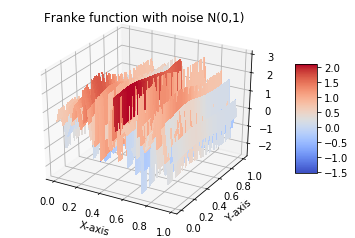

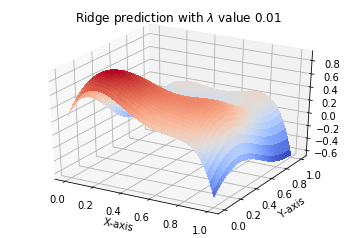

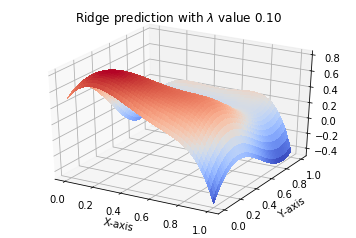

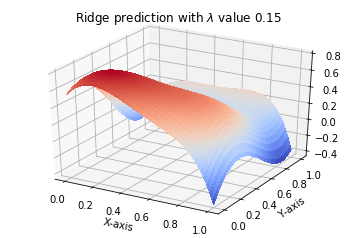

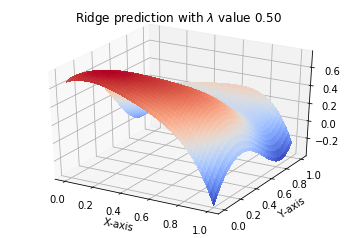

In [15]:
fig = figure()
ax = fig.gca(projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap = cm.coolwarm, linewidth =0, antialiased = False)
xlabel(r'X-axis')
ylabel(r'Y-axis')
title(r'Franke function with noise N(0,1)')

#Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5,aspect=5)
show()


if size(lambRid) > 1:
    i = 0
    for i in range(0,size(lambRid)):
        fig = figure()
        ax = fig.gca(projection='3d')
        surfpred = ax.plot_surface(xb, yb, ZpredicRid[i], cmap = cm.coolwarm, linewidth =0, antialiased = False)
        xlabel(r'X-axis')
        ylabel(r'Y-axis')
        title("Ridge prediction with $\lambda$ value %.2f" % lambRid[i])
    
else:
    fig = figure()
    ax = fig.gca(projection='3d')
    surfpred = ax.plot_surface(xb, yb, ZpredicRid, cmap = cm.coolwarm, linewidth =0, antialiased = False)
    xlabel(r'X-axis')
    ylabel(r'Y-axis')
    title("Ridge prediction with $\lambda$ value %.2f" % lambRid)

    #Add a color bar which maps values to colors.
    fig.colorbar(surfpred, shrink=0.5,aspect=5)
show()

#### Some analyze before resampling method

In [16]:
print("Estimated variance of beta parameters:")
i = 0
for i in range(0,size(lambRid)):
    print("For lambda = %.2f" % lambRid[i])
    print(beta_variance(z, ZpredicRid[i], Xmatrix))

Estimated variance of beta parameters:
For lambda = 0.01
[2.94280093e-02 4.20822684e+00 1.04492115e+02 5.58182044e+02
 6.42502425e+02 1.03009725e+02 3.52389216e+00 8.32649779e+01
 4.29991110e+02 4.81113016e+02 7.61231882e+01 5.42272472e+01
 2.63798898e+02 2.52289757e+02 3.14041881e+02 2.64003547e+02
 3.02916167e+02 6.26151479e+01 6.19856115e+01 5.96744743e+01
 6.30646719e+01]
For lambda = 0.10
[2.93627388e-02 4.19889312e+00 1.04260354e+02 5.56944013e+02
 6.41077373e+02 1.02781252e+02 3.51607627e+00 8.30802986e+01
 4.29037402e+02 4.80045921e+02 7.59543492e+01 5.41069728e+01
 2.63213800e+02 2.51730186e+02 3.13345346e+02 2.63417995e+02
 3.02244308e+02 6.24762693e+01 6.18481292e+01 5.95421181e+01
 6.29247963e+01]
For lambda = 0.15
[2.93608741e-02 4.19862646e+00 1.04253733e+02 5.56908643e+02
 6.41036660e+02 1.02774725e+02 3.51585298e+00 8.30750224e+01
 4.29010155e+02 4.80015435e+02 7.59495256e+01 5.41035366e+01
 2.63197084e+02 2.51714199e+02 3.13325446e+02 2.63401266e+02
 3.02225113e+02 6.2

In [17]:
print("The Ridge lambda/alpha values:" , lambRid)

i = 0
arrayRidMSE = zeros(size(lambRid))
arrayRidBias = zeros(size(lambRid))
arrayRidVar = zeros(size(lambRid))
arrayRidR2 = zeros(size(lambRid))
for i in range(0,size(lambRid)):
    arrayRidMSE[i] = round(mse(z, ZpredicRid[i]),4)
    arrayRidBias[i] = round(bias(z, ZpredicRid[i]),4)
    arrayRidVar[i] = round(my_var(ZpredicRid[i]),4)
    arrayRidR2[i] = round(R2(z,ZpredicRid[i]),4)
    
print("The Ridge mean squared error:" , arrayRidMSE)
print("The Ridge Bias^2:" , arrayRidBias)
print("Variance of the predictor:" , arrayRidVar)
print("The Ridge R2 score:" , arrayRidR2)

The Ridge lambda/alpha values: [0.01, 0.1, 0.15, 0.5]
The Ridge mean squared error: [1.032  1.0297 1.0297 1.0304]
The Ridge Bias^2: [1.0952 1.095  1.0949 1.0949]
Variance of the predictor: [0.0837 0.0737 0.0719 0.068 ]
The Ridge R2 score: [0.0566 0.0587 0.0587 0.0581]


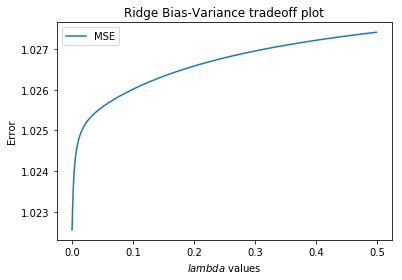

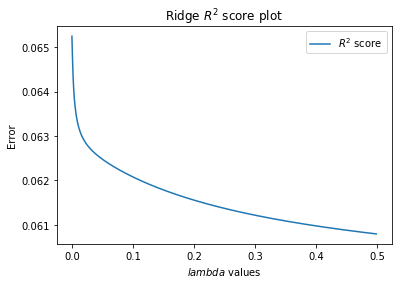

In [18]:
alphasRid = arange(0.0001,0.5, 0.001)

## Bias-Variance tradeoff plot

# Estimating the Ridge predictions for all lambda/alpha values in alphasRid, with 5. degree polynomial fit
X_temp = Vandermonde(xb,yb,5)
ZpredicRid_temp = PredictionRid(z, X_temp, 5, alphasRid)

# Estimate the MSE, Bias and prediction variance for each corresponding lambda/alpha
j = 0
array_Rid_MSE = zeros(size(alphasRid))
array_Rid_Bias = zeros(size(alphasRid))
array_Rid_Var = zeros(size(alphasRid))
array_Rid_R2 = zeros(size(alphasRid))
for j in range(0,size(alphasRid)):
        array_Rid_MSE[j] = mse(z, ZpredicRid_temp[j])
        array_Rid_Bias[j] = bias(z, ZpredicRid_temp[j])
        array_Rid_Var[j] = my_var(ZpredicRid_temp[j])
        array_Rid_R2[j] = R2(z, ZpredicRid_temp[j])
        
plot(alphasRid, array_Rid_MSE, label='MSE')

## Bias and prediction variance don't work properly
#plot(alphasRid, array_Rid_Bias, label='Bias^2')
#plot(alphasRid, array_Rid_Var, label='Prediction var')
xlabel("$lambda$ values")
ylabel("Error")
title("Ridge Bias-Variance tradeoff plot")
legend()
show()

plot(alphasRid, array_Rid_R2, label='$R^2$ score')
xlabel("$lambda$ values")
ylabel("Error")
title("Ridge $R^2$ score plot")
legend()
show()

#### Cross validation, now with Ridge

In [19]:
# More or less identical to MSE and R2 score for OLS, with the exection that we now use Ridge prediction values and we feed
# the defined function a single lambda/alpha value
def mseRid_cv(X_set, Y_set, Z_set, fold_num, order, lamb):
    '''
    Requires: Vandermonde matrix function, PredictionRid fuction and Mean Squared Error function "mse".
     Returns: Here we return an array containing the Mean Squared Error for each fold.
    
       X_set: A list containing the folded/splited arrays corresponding to the x-coordinate.
       Y_set: A list containing the folded/splited arrays corresponding to the y-coordinate.
       Z_set: A list containing the folded/splited arrays corresponding to the z-coordinate.
    fold_num: Number of folds/splits.
       order: Here we send the order in which "Vandermonde_matrix" was fitted.
        lamb: Lambda/alpha value (send in, only one value).
    '''
    
    if size(lamb) > 1:
        print("Please sir, may I have only one lamb. (send only one lambda value)")
        
    
    K = fold_num
    
    mse_array = zeros(K)
    for i in range(0,K):
        Xmatrix = Vandermonde(X_set[i], Y_set[i], order)
        Zpredic= PredictionRid(Z_set[i], Xmatrix, order, lamb)
    
        mse_array[i] = round(mse(Z_set[i],Zpredic),3) # Mean Square error: save estimates in a array
    return mse_array

def R2Rid_cv(X_set, Y_set, Z_set, fold_num, order, lamb):
    '''
    Requires: Vandermonde matrix function, PredictionRid fuction and R2 score function "R2".
     Returns: Here we return an array containing the R2 score for each fold.
    
       X_set: A list containing the folded/splited arrays corresponding to the x-coordinate.
       Y_set: A list containing the folded/splited arrays corresponding to the y-coordinate.
       Z_set: A list containing the folded/splited arrays corresponding to the z-coordinate.
    fold_num: Number of folds/splits.
       order: Here we send the order in which "Vandermonde_matrix" was fitted.
        lamb: Lambda/alpha value (send in, only one value).
    '''
    
    if size(lamb) > 1:
        print("Please sir, may I have only one lamb. (send only one lambda value)")
    
    K = fold_num
    
    R2_array = zeros(K)
    for i in range(0,K):
        Xmatrix = Vandermonde(X_set[i], Y_set[i], order)
        Zpredic= PredictionRid(Z_set[i], Xmatrix, order, lamb)
    
        R2_array[i] = round(R2(Z_set[i],Zpredic),3) # R2 score: save estimates in a array
    
    return R2_array

In [20]:
print ("Ridge regression with Cross-validation")
print ("---------------------------------------")

i = 0
for i in range(0, size(lambRid)):
    
    mseRidTrain_cv_array = mseRid_cv(X_train, Y_train, Z_train, K, 5, lambRid[i])
    mseRidTest_cv_array = mseRid_cv(X_test, Y_test, Z_test, K, 5, lambRid[i])
    R2RidTrain_cv_array = R2Rid_cv(X_train, Y_train, Z_train, K, 5, lambRid[i])
    R2RidTest_cv_array = R2Rid_cv(X_test, Y_test, Z_test, K, 5, lambRid[i])
    
    AverageTrain_mseRid_cv = sum(mseRidTrain_cv_array)/K
    AverageTest_mseRid_cv = sum(mseRidTest_cv_array)/K
    
    AverageTrain_R2Rid_cv = sum(R2RidTrain_cv_array)/K
    AverageTest_R2Rid_cv = sum(R2RidTest_cv_array)/K
    
    print("The Ridge lambda/alpha value:" , lambRid[i])
    # The mean squared error
    print("MSE of training sets (K-fold Cross validation):" , mseRid_cv(X_train, Y_train, Z_train, K, 5, lambRid[i]))
    print("MSE of test sets (K-fold Cross validation):" , mseRid_cv(X_test, Y_test, Z_test, K, 5, lambRid[i]))
    # Explained variance score: 1 is perfect prediction
    print('R2 score of training sets (K-fold Cross validation):' , R2Rid_cv(X_train, Y_train, Z_train, K, 5, lambRid[i]))
    print('R2 score of test sets (K-fold Cross validation):' , R2Rid_cv(X_test, Y_test, Z_test, K, 5, lambRid[i]))
    print("-----------------")
    print("Averaged results:")
    print("-----------------")
    print("Average MSE of training sets (K-fold Cross validation): %.2f" % AverageTrain_mseRid_cv)
    print("Average MSE of test sets (K-fold Cross validation): %.2f" % AverageTest_mseRid_cv)
    print('Average R2 score of training sets (K-fold Cross validation): %.2f' % AverageTrain_R2Rid_cv)
    print('Average R2 score of test sets (K-fold Cross validation): %.2f' % AverageTest_R2Rid_cv)
    print("-----------------------------------------------------------------------------------------------------------")

Ridge regression with Cross-validation
---------------------------------------
The Ridge lambda/alpha value: 0.01
MSE of training sets (K-fold Cross validation): [1.084 1.08  1.097 1.109 1.098]
MSE of test sets (K-fold Cross validation): [1.655 3.66  1.222 1.091 1.064]
R2 score of training sets (K-fold Cross validation): [ 0.007 -0.003  0.006 -0.012 -0.01 ]
R2 score of test sets (K-fold Cross validation): [-0.534 -2.415 -0.167 -0.058 -0.036]
-----------------
Averaged results:
-----------------
Average MSE of training sets (K-fold Cross validation): 1.09
Average MSE of test sets (K-fold Cross validation): 1.74
Average R2 score of training sets (K-fold Cross validation): -0.00
Average R2 score of test sets (K-fold Cross validation): -0.64
-----------------------------------------------------------------------------------------------------------
The Ridge lambda/alpha value: 0.1
MSE of training sets (K-fold Cross validation): [1.081 1.07  1.082 1.086 1.078]
MSE of test sets (K-fold Cross

### Part c) Lasso Regression on the Franke function with resampling 

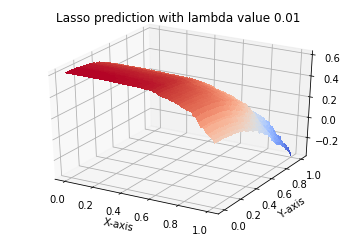

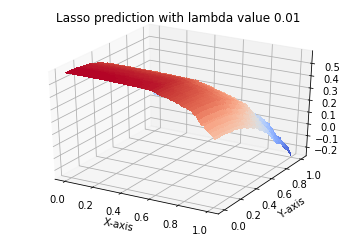

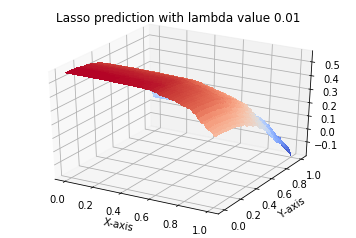

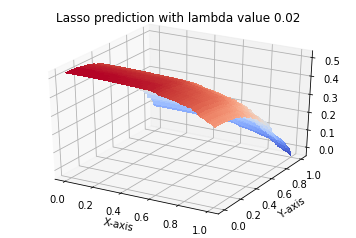

In [21]:
from sklearn.linear_model import Lasso

lambLasso = [0.005, 0.01, 0.013, 0.02]

i = 0
ZpredicLasso = []
Lasso_coef_used = []
for i in range(0,size(lambLasso)):
    # Fitting model and estimating prediction
    lasso_model = Lasso(lambLasso[i], max_iter=100000).fit(Xmatrix, z.ravel())

    Z_temp = lasso_model.predict(Xmatrix)
    ZpredicLasso.append(Z_temp.reshape((N, N)))
    
    Lasso_coef_used.append(sum(lasso_model.coef_ != 0)) # saving the number of features used for each lambda value

    # ploting
    fig = figure()
    ax = fig.gca(projection='3d')
    surfpred = ax.plot_surface(xb, yb, ZpredicLasso[i], cmap = cm.coolwarm, linewidth =0, antialiased = False)
    xlabel(r'X-axis')
    ylabel(r'Y-axis')
    title("Lasso prediction with lambda value %.2f" % lambLasso[i])

    show()

In [22]:
print("The Lasso lambda/alpha values:" , lambLasso)

i = 0
array_Lasso_MSE = zeros(size(lambLasso))
array_Lasso_Bias = zeros(size(lambLasso))
array_Lasso_Var = zeros(size(lambLasso))
array_Lasso_R2 = zeros(size(lambLasso))
for i in range(0,size(lambLasso)):
    array_Lasso_MSE[i] = round(mse(z, ZpredicLasso[i]),3)
    array_Lasso_Bias[i] = round(bias(z, ZpredicLasso[i]),3)
    array_Lasso_Var[i] = round(my_var(ZpredicLasso[i]),3)
    array_Lasso_R2[i] = round(R2(z,ZpredicLasso[i]),3)
    
print("Number of features used for each corresponding lambda value:" , Lasso_coef_used)
print("The Lasso mean squared error:" , array_Lasso_MSE)
print("The Lasso Bias:" , array_Lasso_Bias)
print("Variance of the Lasso predictor:" , array_Lasso_Var)
print('The Lasso R2 score:' , array_Lasso_R2)
print("-------------------------------------------------------------------------------------------------")

The Lasso lambda/alpha values: [0.005, 0.01, 0.013, 0.02]
Number of features used for each corresponding lambda value: [2, 2, 2, 2]
The Lasso mean squared error: [1.042 1.044 1.046 1.053]
The Lasso Bias: [1.094 1.094 1.094 1.094]
Variance of the Lasso predictor: [0.042 0.032 0.027 0.018]
The Lasso R2 score: [0.048 0.046 0.044 0.037]
-------------------------------------------------------------------------------------------------


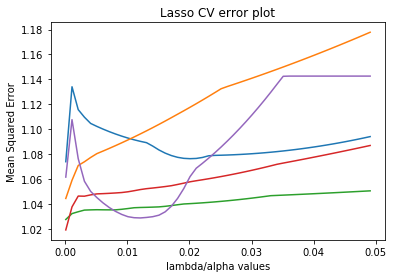

In [23]:
from sklearn.linear_model import LassoCV

# conducting some analysis to determine the best alpha value
alphas = arange(0.0001,0.05, 0.001)

# Each line represents a fold
lasso = LassoCV(alphas=alphas, max_iter = 100000, cv = K).fit(Xmatrix, z.ravel())
plot(lasso.alphas_, lasso.mse_path_)
xlabel("lambda/alpha values")
ylabel("Mean Squared Error")
title("Lasso CV error plot")
show()

In [24]:
from sklearn.linear_model import LassoCV

i = 0
for i in range(0,size(lambLasso)):
    print ("Lasso regression with lambda =" , lambLasso[i])
    lasso = LassoCV(lambLasso[i], max_iter=100000, cv = K).fit(Xmatrix, z.ravel())

    print("Lasso score: %f" % lasso.score(Xmatrix, z.ravel()))
    print("number of features used: %d" % sum(lasso.coef_ != 0))
    print("--------------------------------------")
    

Lasso regression with lambda = 0.005
Lasso score: 0.060938
number of features used: 8
--------------------------------------
Lasso regression with lambda = 0.01
Lasso score: 0.045967
number of features used: 2
--------------------------------------
Lasso regression with lambda = 0.013
Lasso score: 0.045890
number of features used: 2
--------------------------------------
Lasso regression with lambda = 0.02
Lasso score: 0.045984
number of features used: 2
--------------------------------------
